## Acknowledgements

* **First notebook** as a new Kaggler after getting the Google Data Analytics Certificate 
* If you like the content, an **upvote** would be appreciated a lot :) 
* Please don't hesitate to leave a **comment**

### Credits

* Google course's guidelines and data analytics steps were very helpful. 
* For inspiration and help in R code: credits to [Jhelison Gabriel Lima Uchoa](https://www.kaggle.com/jhelisonuchoa/google-data-analytics-capstone-case-study-1) and [Julen Aranguren](https://www.kaggle.com/julenaranguren/cyclistic-bike-share-a-case-study).

## CAPSTONE PROJECT: Google Data Analytics Certificate 

The dataset and the case study are proposed as capstone project for the Google Data Analytics Capstone. 
In this case study, I will perform many real-world tasks of a junior data analyst. 
I will work for a fictional company, Cyclistic, and meet different characters and team members. 
In order to answer the key business questions, I will follow the **steps of the data analysis process: ask, prepare, process, analyze,
share, and act**.
This case study is a tangible way to demonstrate my knowledge and skills to potential employers. 

**Scenario**
    
    You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.
    
 **Characters and teams**
 
    Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also oering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
    
    Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
    
    Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
    
    Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

**About the company**

    In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. 
    
    Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
    
    Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
    
    Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


## PHASE 1: ASK

**Business task**

Identify differences and trends between casual and annual members using Cyclistic bikes to help increase annual memberships.

**Key question**

“In what ways do members and casual riders use bikes differently?”

**Key Stakeholders**

My manager Lily Moreno, Exec team, Marketing analytics team. 


## PHASE 2: PREPARE

**Tasks**

* Data **download and location**: Dataset is in Kaggle. 
* Data **organisation**: 12 CSV files by month, full year 2021.
* Data ROCCC: no bias and **credibility**, company has its reasons to analyse data of its own clients (bike riders). 
* Licence, privacy, security, accessibility: no possibility to identify the clients, data is under license. 
* Data integrity: by verifying the files, the data is consistent (same format, same data types), but data is not complete as there are some missing values. 
* Data is sorted and filtered: 12 files, columns consistent.
* Any problems with the data? Missing values for End Station Name and ID. 

**Deliverable: Description of all data sources used**

The dataset is in Kaggle attached to this notebook. It can also be found [here](https://divvy-tripdata.s3.amazonaws.com/index.html) by downloading each CSV file of every month for the year 2021.

## PHASE 3: PROCESS

**Tasks**

* Tools: **R and SQL**. Spreadsheets is not the best choice for handling and analysing huge chunks of data like this dataset. 
* **Checked for errors**. 
* **Data integrity**: yes, columns are consistent. Data has been transformed accordingly. 
* **Data cleaning steps**: Remove duplicates, columns formatted to consistent format.
* How can you verify that your data is clean and ready to analyze? Check this notebook.
* **Cleaning process** and data manipulation has been documented here **below**.

1. Add columns that list the date, month, day, and year of each ride
2. Add a "ride_length" calculation to all_trips (in seconds)
3. Convert "ride_length" from Factor to numeric so we can run calculations on the data
4. Remove "bad" data: The dataframe includes a few entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative.


In [1]:
# Install required packages
# tidyverse for data import and wrangling
# lubridate for date functions
# ggplot for visualization

library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

# Loading the dataset : 12 files - 12 months of 2021 
# Concatenating csv files into one single dataframe called cyclistic_2021
csv_files <- list.files(path = "../input", recursive = TRUE, full.names=TRUE)
all_trips <- do.call(rbind, lapply(csv_files, read.csv))

# Other possible way to create a single dataframe : bind_rows function

# DATA CLEANING

# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?

# we will use janitor to remove empty columns/rows/NA 
install.packages("janitor")
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5595063

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)

[1] 5595063      13

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


In [3]:
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

'data.frame':	5595063 obs. of  13 variables:
 $ ride_id           : chr  "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-01-23 16:14:19" "2021-01-27 18:43:08" "2021-01-21 22:35:54" "2021-01-07 13:31:13" ...
 $ ended_at          : chr  "2021-01-23 16:24:44" "2021-01-27 18:47:12" "2021-01-21 22:37:14" "2021-01-07 13:42:55" ...
 $ start_station_name: chr  "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr  "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num  -87.7 -

   ride_id          rideable_type       started_at          ended_at        
 Length:5595063     Length:5595063     Length:5595063     Length:5595063    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5595063     Length:5595063     Length:5595063     Length:5595063    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [4]:
# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level
# https://www.statmethods.net/input/dates.html more on date formats in R found at that link
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$hour <- lubridate::hour(all_trips$started_at)


In [5]:
# Add a "ride_length" calculation to all_trips (in minutes)
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at, units = "mins")

# Inspect the structure of the columns
str(all_trips)


'data.frame':	5595063 obs. of  20 variables:
 $ ride_id           : chr  "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-01-23 16:14:19" "2021-01-27 18:43:08" "2021-01-21 22:35:54" "2021-01-07 13:31:13" ...
 $ ended_at          : chr  "2021-01-23 16:24:44" "2021-01-27 18:47:12" "2021-01-21 22:37:14" "2021-01-07 13:42:55" ...
 $ start_station_name: chr  "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr  "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num  -87.7 -

In [6]:
# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)


[1] FALSE

[1] TRUE

In [7]:
all_trips$ride_length <- round(all_trips$ride_length, digits = 1)#round to tenth decimal place

**Using mutate function to create: season (Spring, Summer, Fall, Winter) column**

In [8]:
all_trips <- all_trips %>% 
    mutate(season = case_when(
            month == "03" ~ "Spring",
            month == "04" ~ "Spring",
            month == "05" ~ "Spring",
            month == "06"  ~ "Summer",
            month == "07"  ~ "Summer",
            month == "08"  ~ "Summer",
            month == "09" ~ "Fall",
            month == "10" ~ "Fall",
            month == "11" ~ "Fall",
            month == "12" ~ "Winter",
            month == "01" ~ "Winter",
            month == "02" ~ "Winter")
          )

**Using mutate function to create: time_of_day (Night, Morning, Afternoon, Evening)**

In [9]:
all_trips <- all_trips %>% mutate(time_of_day = 
                                             case_when(
                                              hour(started_at)>=6 & hour(started_at)<11 ~ '1.Morning',
                                                hour(started_at)>=11 & hour(started_at)<13 ~ '2.Lunch',
                                                hour(started_at)>=13 & hour(started_at)<17 ~ '3.Afternoon',
                                                hour(started_at)>=17 & hour(started_at)<22 ~ '4.Evening',
                                                hour(started_at)<6 | hour(started_at)>= 22 ~ '5.Night'))

**Weekdays ordered**

In [10]:
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

**Mutate function to create names for the months**

In [11]:
all_trips <- all_trips %>% mutate(month = case_when(month == "01" ~ "January",
                                                       month == "02" ~ "February",
                                                       month == "03" ~ "March",
                                                       month == "04" ~ "April",
                                                       month == "05" ~ "May",
                                                       month == "06" ~ "June",
                                                       month == "07" ~ "July",
                                                       month == "08" ~ "August",
                                                       month == "09" ~ "September",
                                                       month == "10" ~ "October",
                                                       month == "11" ~ "November",
                                                       month == "12" ~ "December"))

In [12]:
# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed
# https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]


In [13]:
# Remove empty columns, rows and remove NA values all into a new data frame

all_trips_v2 <- janitor::remove_empty(all_trips, which = c("cols"))
all_trips_v2 <- janitor::remove_empty(all_trips, which = c("rows"))
all_trips_v2 <- distinct(all_trips)
all_trips_v2 <- na.omit(all_trips)

In [14]:
#View the dimension
dim(all_trips_v2)

[1] 5590292      22

In [15]:
all_trips_v2 <- all_trips_v2 %>%
    filter(ride_length>0) %>% 
    select(-c(start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng))

In [16]:
View(all_trips_v2)
dim(all_trips_v2)

ride_id,rideable_type,started_at,ended_at,start_station_name,member_casual,date,month,day,year,day_of_week,hour,ride_length,season,time_of_day
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<ord>,<int>,<dbl>,<chr>,<chr>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,member,2021-01-23,January,23,2021,Saturday,16,10.4,Winter,3.Afternoon
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,member,2021-01-27,January,27,2021,Wednesday,18,4.1,Winter,4.Evening
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,member,2021-01-21,January,21,2021,Thursday,22,1.3,Winter,5.Night
4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,member,2021-01-07,January,07,2021,Thursday,13,11.7,Winter,3.Afternoon
BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,casual,2021-01-23,January,23,2021,Saturday,2,0.7,Winter,5.Night
5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,casual,2021-01-09,January,09,2021,Saturday,14,53.8,Winter,3.Afternoon
09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,member,2021-01-04,January,04,2021,Monday,5,5.6,Winter,5.Night
DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,member,2021-01-14,January,14,2021,Thursday,15,6.7,Winter,3.Afternoon
C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,member,2021-01-09,January,09,2021,Saturday,9,2.5,Winter,1.Morning


[1] 5582649      15

In [17]:
# Check again for errors
summary(all_trips_v2)

   ride_id          rideable_type       started_at          ended_at        
 Length:5582649     Length:5582649     Length:5582649     Length:5582649    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name member_casual           date               month          
 Length:5582649     Length:5582649     Min.   :2021-01-01   Length:5582649    
 Class :character   Class :character   1st Qu.:2021-06-07   Class :character  
 Mode  :character   Mode  :character   Median :2021-08-01   Mode  :character  
                                       Mean   :2021-07-28           

## PHASE 4: ANALYZE

Now that the data is stored appropriately and is prepared for analysis, we can start the analysis. 

**Task**
* Data aggregation: done. Data is accessible. 
* Data is formatted and organized. 
* Calculations performed: see below. 
* Trends and relationships identied: see below.


In [18]:
# DESCRIPTIVE ANALYSIS

# Data distribution : Percentage of user types

all_trips_v2 %>% 
    group_by(member_casual) %>% 
    summarise(count = length(ride_id), 'Percentage' = length(ride_id) / nrow(all_trips_v2) * 100)

member_casual,count,Percentage
<chr>,<int>,<dbl>
casual,2523122,45.19578
member,3059527,54.80422


Member riders have a slightly bigger proportion (55%) in the dataset, with 5% more than casuals. 

How can Cyclistic and the marketing team convert more casuals into subscribing for annual membership? 

### Analysis phase: Ride duration

In [19]:
# Descriptive analysis on ride_length (all figures in minutes)

# mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
# median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
# max(all_trips_v2$ride_length) #longest ride
# min(all_trips_v2$ride_length) #shortest ride

# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.10     6.80    12.00    21.01    21.80 55944.20 

The max value as an outlier may be a problem for plotting. 
Let's check the quantiles by 5 %: 

In [20]:
trips_quantiles = quantile(all_trips_v2$ride_length, seq(0, 1, by=0.05))
trips_quantiles

0%      5%     10%     15%     20%     25%     30%     35%     40%     45% 
    0.1     2.8     4.0     5.0     5.9     6.8     7.7     8.7     9.7    10.8 
    50%     55%     60%     65%     70%     75%     80%     85%     90%     95% 
   12.0    13.4    14.9    16.8    19.0    21.8    25.3    30.0    37.6    55.5 
   100% 
55944.2

We are going to drop the last 5% of the data points of ride_length, through using a subset without these outliers. 

In [21]:
trips_without_outliners <- all_trips_v2 %>% 
    filter(ride_length > as.numeric(trips_quantiles['0%'])) %>%
    filter(ride_length < as.numeric(trips_quantiles['95%']))

print(paste("Removed", nrow(all_trips_v2) - nrow(trips_without_outliners), "rows as outliners" ))

[1] "Removed 291765 rows as outliners"


In [22]:
trips_without_outliners %>% 
    group_by(member_casual) %>% 
    summarise(mean = mean(ride_length),
              'first_quarter' = as.numeric(quantile(ride_length, .25)),
              'median' = median(ride_length),
              'third_quarter' = as.numeric(quantile(ride_length, .75)),
              'IR' = third_quarter - first_quarter)

member_casual,mean,first_quarter,median,third_quarter,IR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,17.61120,8.5,14.4,24.0,15.5
member,12.40001,5.6,9.6,16.3,10.7


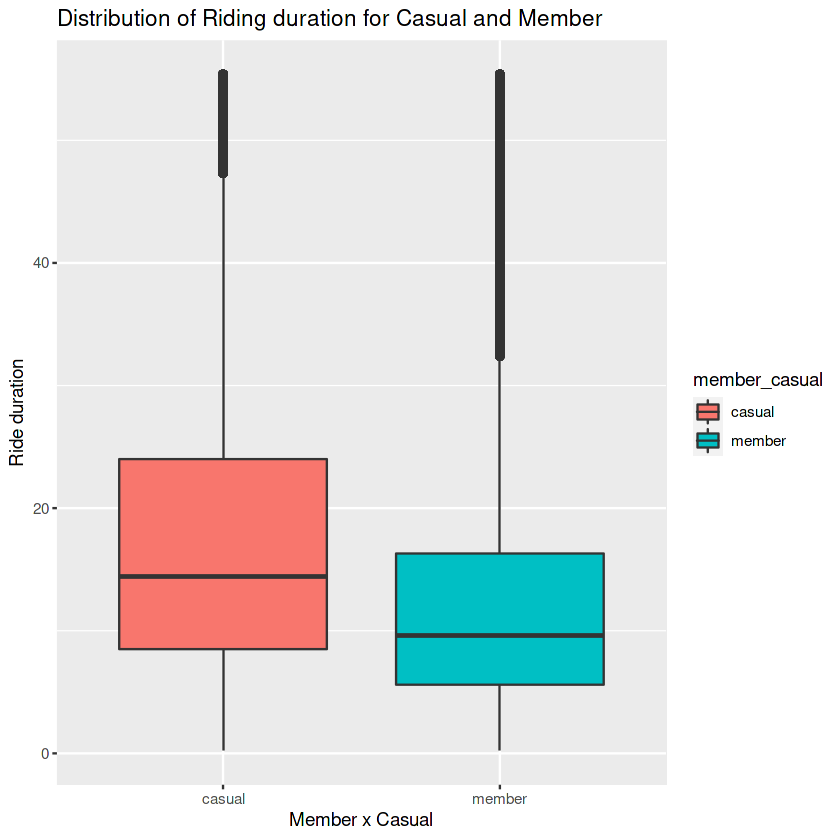

In [23]:
#Viz with a boxplot by ride duration
ggplot(trips_without_outliners, aes(x=member_casual, y=ride_length, fill=member_casual)) +
    labs(x="Member x Casual", y="Ride duration", title="Distribution of Riding duration for Casual and Member") +
    geom_boxplot()

* Casual riders travel slightly more in time  than members.
* Mean and IQR also bigger for casual riders. 
* However, more outliers and more dispersed in duration (33 - 55+ minutes) for members.

--> let's see if we can learn more about ride duration: 

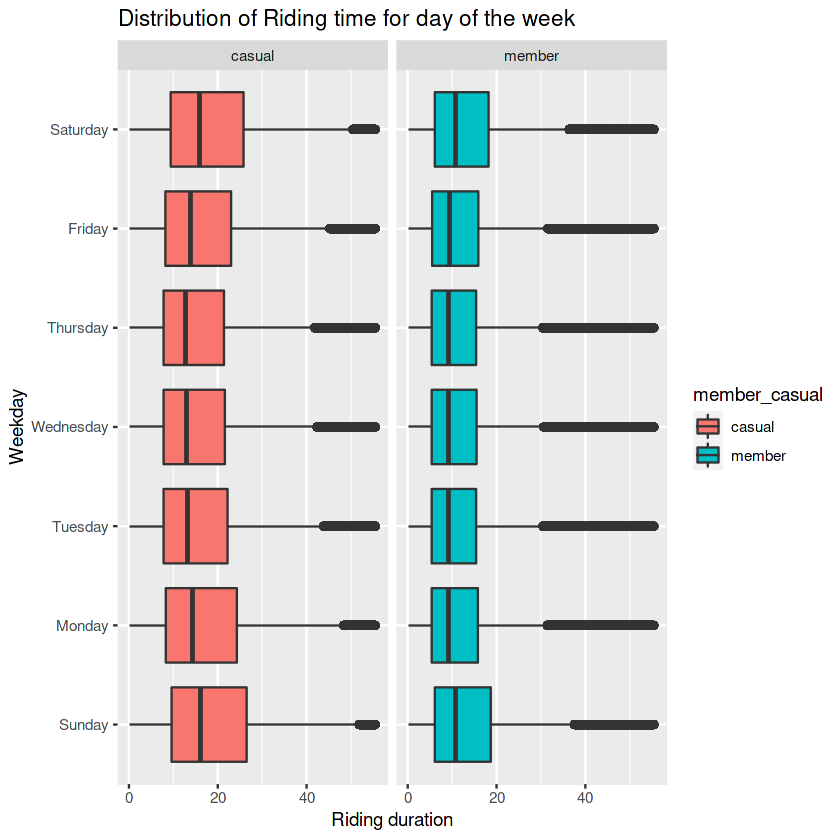

In [24]:
# Viz with a boxplot per day by ride duration
ggplot(trips_without_outliners, aes(x=day_of_week, y=ride_length, fill=member_casual)) +
    geom_boxplot() +
    facet_wrap(~ member_casual) +
    labs(x="Weekday", y="Riding duration", title="Distribution of Riding time for day of the week") + 
    coord_flip()

Members use bikes in a steady way during workdays, and they increase their time during weekends. 

Casual users increase their ride time from Friday to Monday with a peak on Sundays, riding time remains relatively steady from Tuesday to Thursday. 

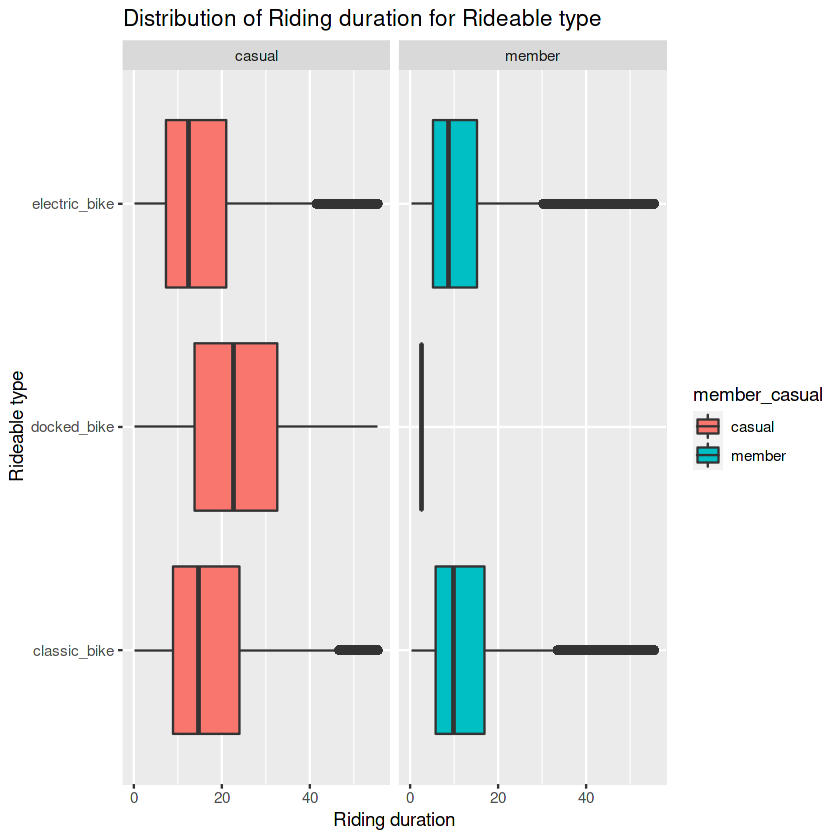

In [25]:
# Viz with a boxplot per rideable type by ride duration

ggplot(trips_without_outliners, aes(x=rideable_type, y=ride_length, fill=member_casual)) +
    geom_boxplot() +
    facet_wrap(~ member_casual) +
    labs(x="Rideable type", y="Riding duration", title="Distribution of Riding duration for Rideable type") +
    coord_flip()

* Ride duration with electric and classic bike is more or less the same for members.
* Casuals ride longer with docked bikes than with classic or electric. 

In [26]:
# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,30.26593
member,13.37729


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,16.0
member,9.6


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,55944.2
member,1499.9


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0.1
member,0.1


In [27]:
# See the average ride time by each day  for members vs casual users

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,35.36450
member,Sunday,15.28036
casual,Monday,30.31309
member,Monday,12.96304
casual,Tuesday,26.73881
member,Tuesday,12.59041
casual,Wednesday,26.25289
member,Wednesday,12.64801
casual,Thursday,26.07322


On average, casuals ride 2x longer than members.

In [28]:
# EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

# Create a csv file that we will visualize in Excel, Tableau, or my presentation software
# N.B.: You can read more here: https://datatofish.com/export-dataframe-to-csv-in-r/
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

write.csv(counts, 'counts_summary.csv', row.names = FALSE)

library(writexl)
writexl::write_xlsx(counts, 'counts_summary.xlsx')

Above is just an example of how to save a file - csv or xlsx - on Kaggle/output, then find it in the notebook to export/download it on PC. 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



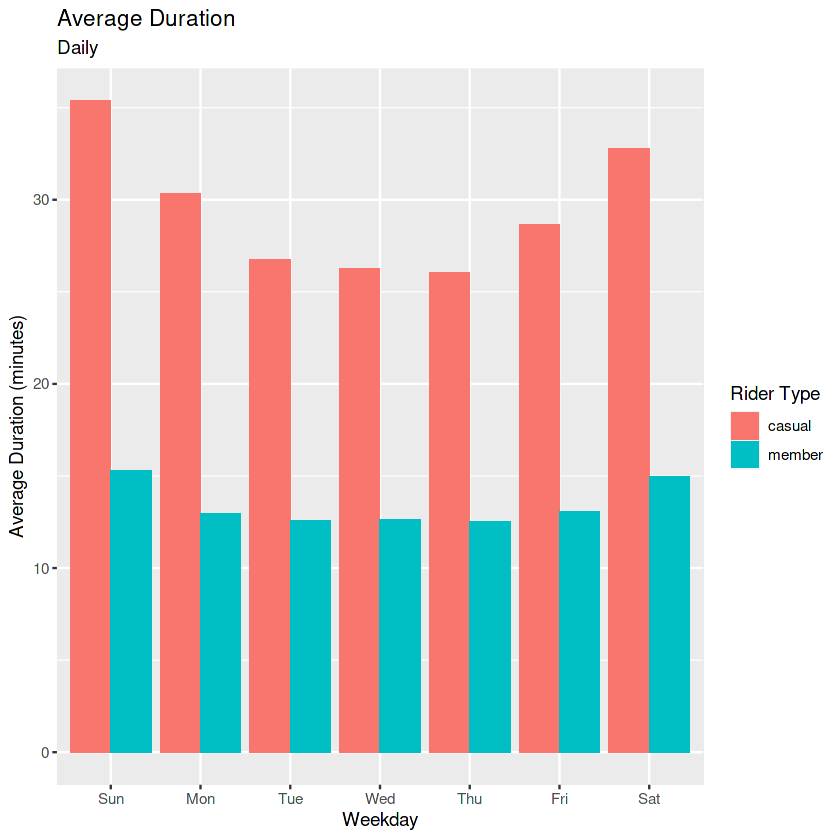

In [29]:
# Now let's visualize average duration by type and weekday

all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Duration", subtitle = "Daily", fill = "Rider Type") +
  xlab("Weekday") + ylab("Average Duration (minutes)")

Casuals ride in general more minutes throughout the week than members, twice as much than members. 



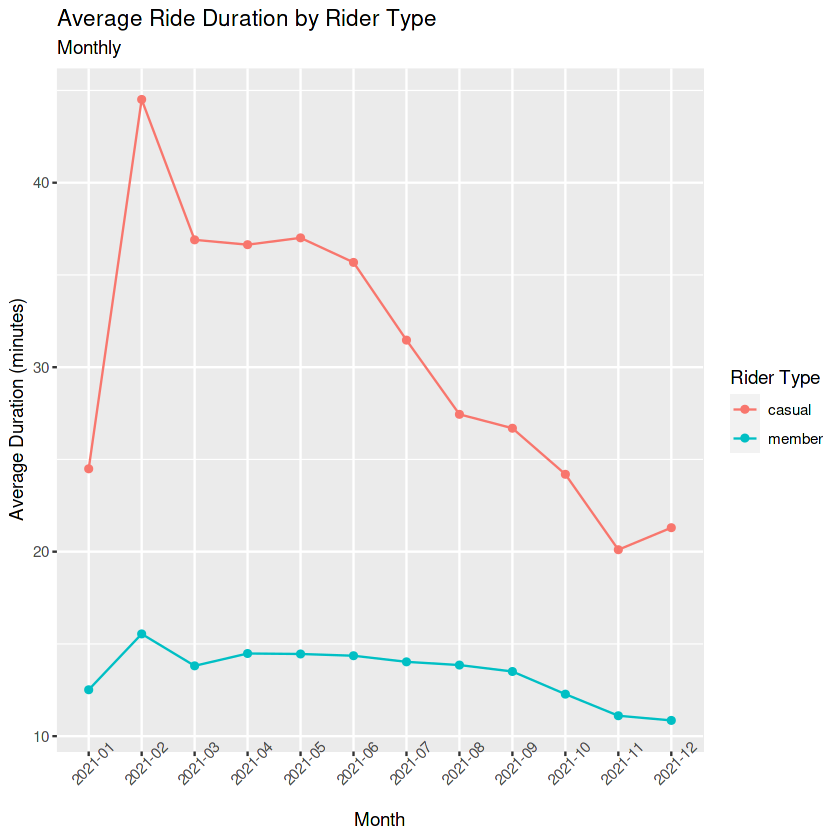

In [30]:
# Average duration by type and month

all_trips_v2 %>% 
  mutate(monthly = format(as.Date(started_at), "%Y-%m")) %>% 
  group_by(member_casual, monthly, year) %>% 
  summarise(number_of_rides = n(),average_duration = mean(ride_length), .groups = "keep") %>% 
  arrange(year, monthly, member_casual)  %>% 
  ggplot(aes(x = monthly, y = average_duration, group = member_casual)) +
  geom_line(aes(color=member_casual)) + 
  geom_point(aes(color=member_casual)) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title = "Average Ride Duration by Rider Type", subtitle = "Monthly", color = "Rider Type") +
  xlab("Month") + ylab("Average Duration (minutes)")

In common:
* February 2021 seems to be the month casuals and members used to ride the most: 50 minutes on average for casual riders and 15+ minutes for members. This observation needs to be faced with number of rides as February is a cold month.

* Autumn seems to be the time where users ride the least on average. 

Casuals:
* Ride duration remains steady and high on average for casuals from March to June. It is possible that this observation is correlated to good weather during Spring season. However, we don't dispose of weather data for this dataset.

Members:
* Ride duration is steady from March to September, which makes them regular users, at least regarding the duration of their ride, for Spring and Summer season.





### Analysis phase: Number of Rides

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



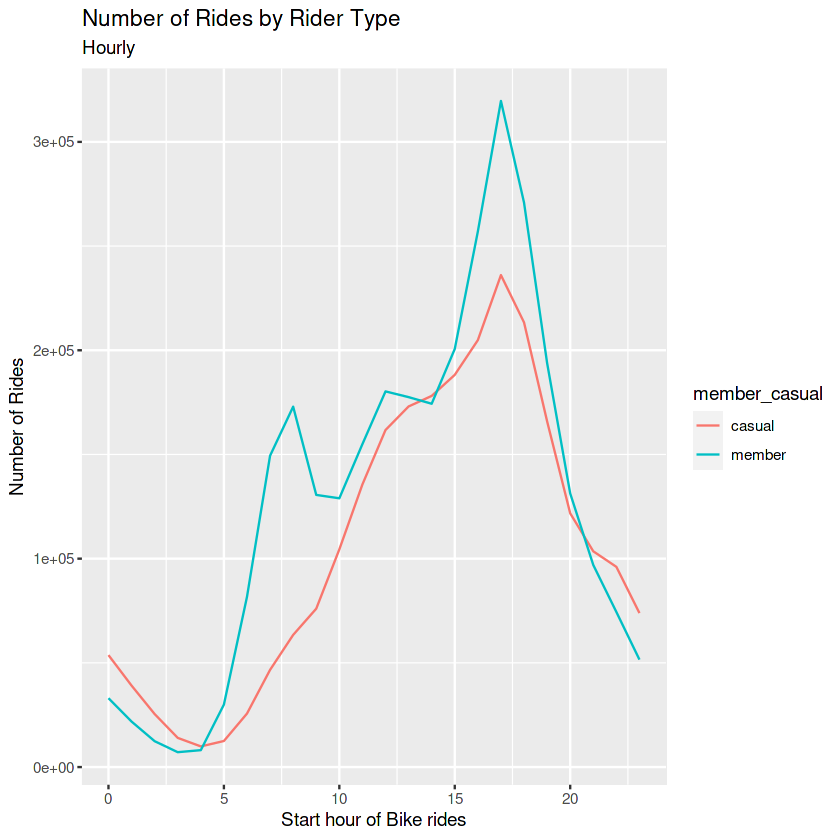

In [31]:
# Analyze rides by rider type and hour
# Display rush hours
all_trips_v2 %>% 
    group_by(member_casual, hour) %>%  #groups by usertype and hour
    summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% #calculates the number of rides and average duration & calculates the average duration
    arrange(member_casual, hour) %>% # sorts
    ggplot(aes(x = hour, y = number_of_rides, fill = member_casual)) +
    geom_line(aes(color = member_casual)) + 
    labs(title = "Number of Rides by Rider Type", subtitle = "Hourly", fill = "Rider Type") +
    xlab("Start hour of Bike rides") + ylab("Number of Rides")


* Members : 2 peaks, one in the morning and the other in the afternoon. The hours are linked with starting and ending the workday.

* For casual riders, we see mainly a peak in the afternoon. 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



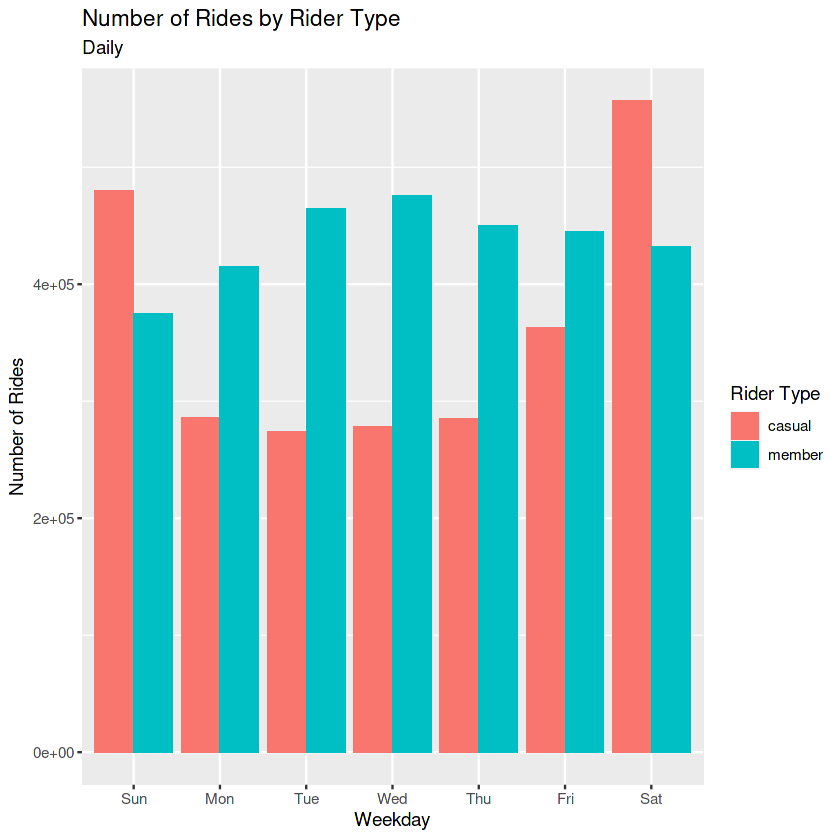

In [32]:
# Let's visualize the number of rides by type and weekday
all_trips_v2 %>% 
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual, weekday) %>% 
    summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% 
    arrange(member_casual, weekday)  %>% 
    ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
    geom_col(position = "dodge") + 
    labs(title = "Number of Rides by Rider Type", subtitle = "Daily", fill = "Rider Type") +
    xlab("Weekday") + 
    ylab("Number of Rides")


Members: 
* Steady also in the numbers of rides during the week.
* They ride less during the weekend.

Casual:
* Not riding a lot during the week, number increases Friday until Sunday with a peak on Saturday. 

We can make a hypothesis that members use the bike to commute every day and ride during weekends for leisure. 

Casual riders use the bike mostly during the weekend, shown through average ride duration and number of rides.

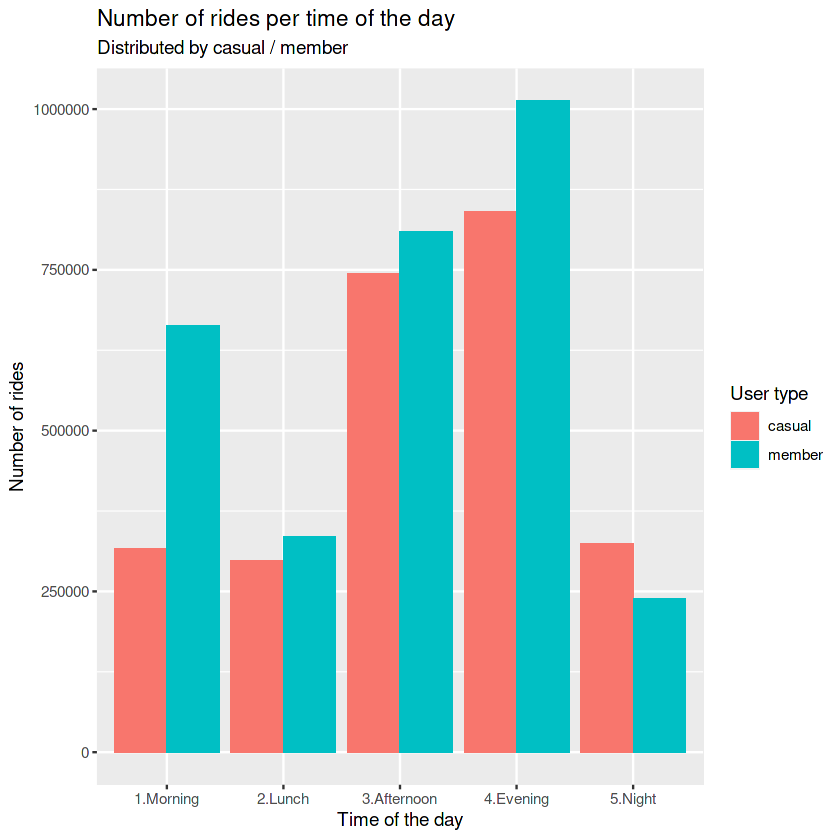

In [33]:
# Let's visualize the number of rides by time of the day 

all_trips_v2 %>% ggplot() +
  geom_bar(mapping = aes(x = time_of_day, fill = member_casual),position = "dodge") +
  labs(title="Number of rides per time of the day",subtitle = "Distributed by casual / member",x="Time of the day",y="Number of rides",fill = "User type")

Casuals and members ride mostly in the afternoon and the evening.
However, members ride in the morning as much as in the evening, unlike the casuals.

`summarise()` has grouped output by 'member_casual', 'monthly'. You can override using the `.groups` argument.



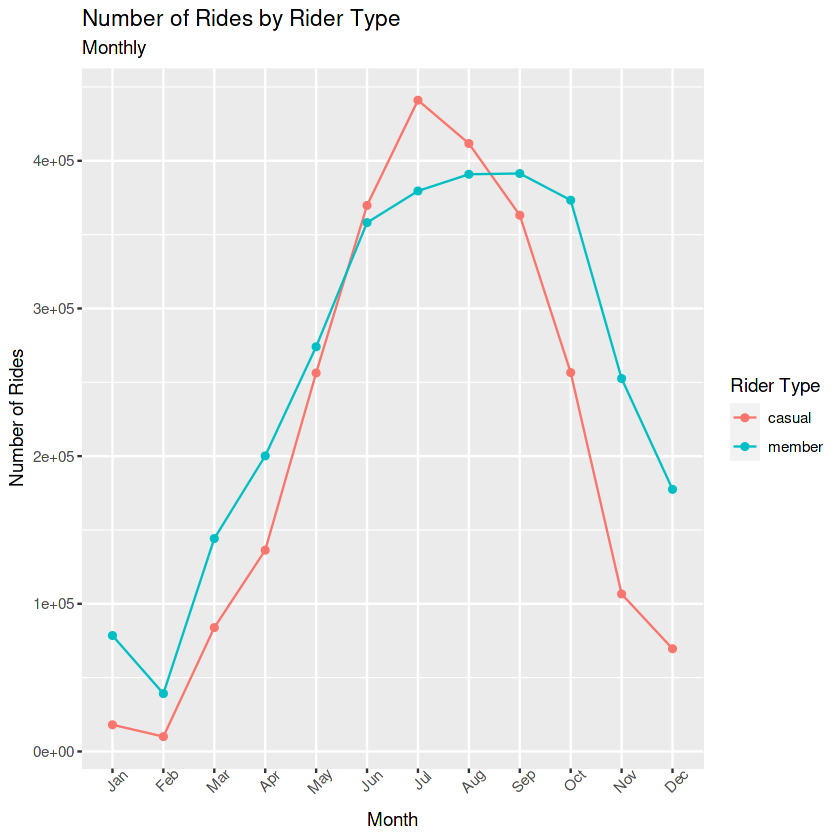

In [34]:
# Let's visualize the number of rides by type and month
all_trips_v2 %>% 
    mutate(monthly = month(started_at, label = TRUE)) %>% 
    group_by(member_casual, monthly, year) %>%  
    summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
    arrange(year, monthly, member_casual) %>%
    ggplot(aes(x = monthly, y = number_of_rides, group = member_casual)) +
    geom_line(aes(color=member_casual)) + 
    geom_point(aes(color=member_casual)) +
    theme(axis.text.x = element_text(angle = 45)) +
    labs(title = "Number of Rides by Rider Type", subtitle = "Monthly", color = "Rider Type") +
    xlab("Month") + ylab("Number of Rides")

* February is the month with the least number of rides, which means compared with average duration, that those who used a bike - casual or member - were riding more time than usual. 

* Numbers of rides goes up as soon as String season starts, reaches a peak in the summer and declines in October for Casuals and November for members. 

* We can observe that casual riders outnumber members from July to August by number of rides. After September, casual riders tend to use less and less the bike service. 


### Analysis phase: Bike type by user type / weekday

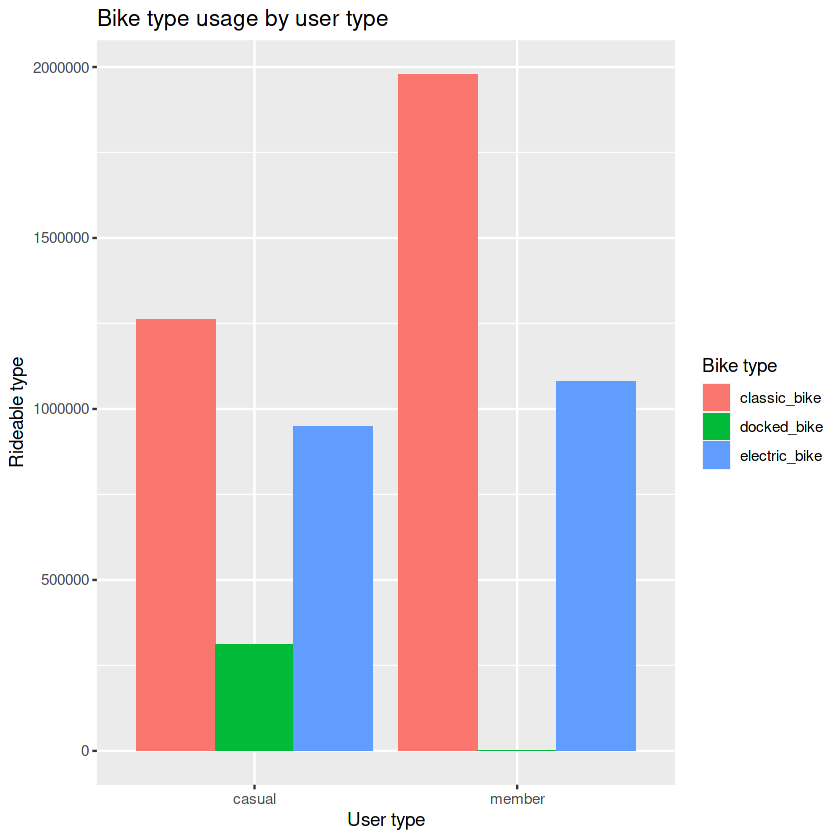

In [35]:
# Viz rideable type by user type
all_trips_v2 %>%
    group_by(member_casual,rideable_type) %>%
    summarise(totals=n(), .groups="drop")  %>%
    ggplot() +
    geom_col(aes(x = member_casual,y = totals, fill = rideable_type), position = "dodge") + 
    labs(title = "Bike type usage by user type",x="User type",y="Rideable type", fill="Bike type")

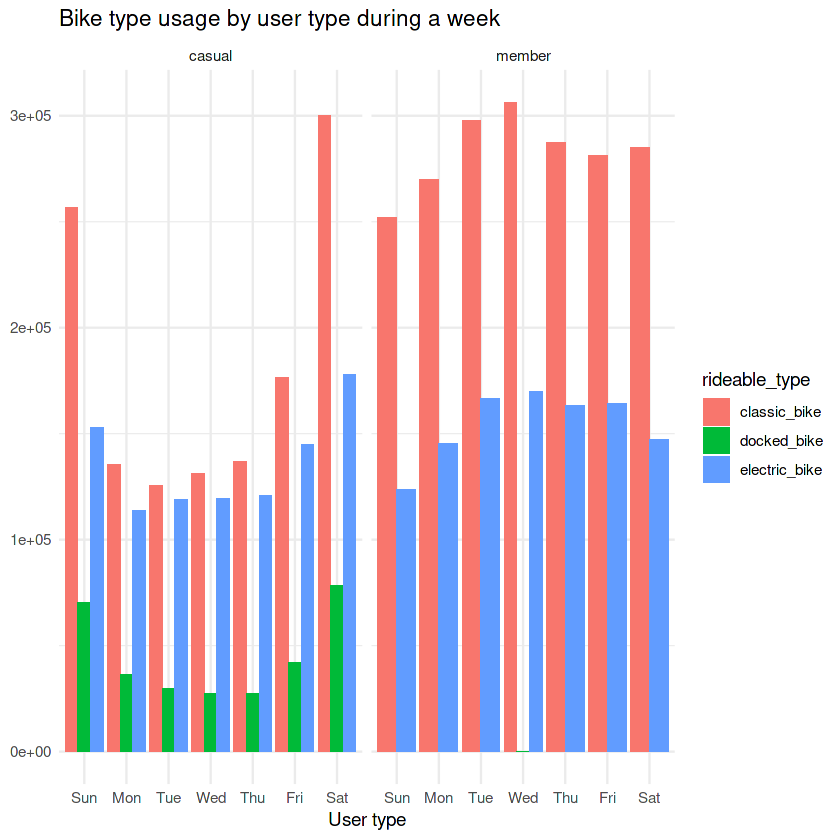

In [36]:
# Viz rideable type by user type and weekday
all_trips_v2 %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual,rideable_type,weekday) %>%
    summarise(totals=n(), .groups="drop") %>%
    ggplot(aes(x=weekday,y=totals, fill=rideable_type)) +
    geom_col(, position = "dodge") + 
    facet_wrap(~member_casual) +
    labs(title = "Bike type usage by user type during a week",x="User type",y=NULL) +
    theme_minimal() 

Casuals:
* They use more classic bikes during weekends.
* They use docked bikes. 

Members:
* First choice is classic bike, then electric.
* Usage of both types remains relatively steady during the week. 

### Analysis conclusions

Members represent 55 % of this dataset, casuals 45%. 

What are the differences between these 2 types? 

**Ride duration:** 

* On average, casuals ride 2x longer than members.
* Week: Members use bikes in a steady way during workdays, and they ride longer during weekends.
* Week: Casual users increase their ride time from Friday to Monday with a peak on Sundays, riding time remains relatively steady from Tuesday to Thursday.

**Monthly ride duration**

* February 2021 seems to be the month casuals and members used to ride the most: 50 minutes on average for casual riders and 15+ minutes for members. This observation needs to be faced with number of rides as February is a cold month.
* Autumn seems to be the time where users ride the least on average. 

Casuals:
* Ride duration remains steady and high on average for casuals from March to June. It is possible that this observation is correlated to good weather during Spring season. However, we don't dispose of weather data for this dataset.

Members:
* Ride duration is steady from March to September, which makes them regular users, at least regarding the duration of their ride, for Spring and Summer season.

**Number of rides during the day**

* Members : 2 peaks, one in the morning and the other in the afternoon. The hours are linked with starting and ending the workday.
* For casual riders, we see mainly a peak in the afternoon.

**Number of rides during the week**
Members:
* Steady also in the numbers of rides during the week.
* They ride less during the weekend.
Casual:
* Not riding a lot during the week, number increases Friday until Sunday with a peak on Saturday.

We can make a hypothesis that members use the bike to commute every day and ride during weekends for leisure.
Casual riders use the bike mostly during the weekend, shown through average ride duration and number of rides.

**Number of rides throughout the year**

Casuals and members ride mostly in the afternoon and the evening. However, members ride in the morning as much as in the evening, unlike the casuals.

* February is the month with the least number of rides, which means compared with average duration, that those who used a bike - casual or member - were riding longer than usual.
* Numbers of rides goes up as soon as String season starts, reaches a peak in the summer and declines in October for Casuals and November for members.
* We can observe that casual riders outnumber members from July to August by number of rides. After September, casual riders tend to use less and less the bike service.


## PHASE 5: SHARE

Normally, we'd use a set of slides as a presentation of our findings and recommendations, but here we'll use this Kaggle notebook. 

We found most of the observations though data visualizations, which can be used for a slide presentation.


**Our findings**

* Day: members and casuals use bikes mostly on the afternoon. Members have also a peak of use in the morning. 
* Week: Casuals use bikes more during the weekends and with longer periods of time while members are riding consistently throughout the week.
* Month: Casuals ride the longest from March to June, while members have a steady time duration of their rides from March to September.
* Year: Both casual and member riders have more rides starting from the spring season until September/October.
* Year: Both casual and member riders use the bike longer during summer and shorter during winter. 
* Average: casuals ride 2x longer than members. They ride longer during weekends while members have a set schedule on mornings and afternoons for commuting (assumption).
* Bike type: Members have a bigger preference for classic bikes, making them have exercice while commuting (assumption).
* Bike type: Casuals prefer classic bikes as well, especially during weekends. However, the results can be biased by the availability of classic, electric and docked bikes (not the same amount of bikes available).

What we can take from this information is that members have a more fixed use for bikes than casuals. Their bike use is for routine activities, like:
* Commuting.
* (Sport)


Conclusion - What tells the data:
* Members use the bikes for fixed activities, i.e. commuting.
* Bikes are used for leisure during the weekends, starting Friday.

## PHASE 6: ACT

After having my presentation for my manager and the exec team, the marketing team will act on the recommendations as takeaways of my presentation. 



**Recommendations**

* Show through a campaign how members and casuals are having the same frequency of using bikes throughout the year and start the campaign in March, when weather conditions improve and people start going out (as data shows).
* Make an ad that focus on saving as a member for longer ride duration to get casuals sign up as member riders, besides the fact that they can use bikes for commuting.
* Make special discount at the Spring season showing the possibilities of commuting during workdays and leisure during the weekend.

 